# MNIST Digit Classification with Keras

This Jupyter Notebook demonstrates how to build a simple feedforward neural network using Keras to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 testing images of handwritten digits (0-9) with a resolution of 28x28 pixels.

## Dependencies

This notebook requires the following dependencies:
- pandas
- keras
- tensorflow
- matplotlib

## Data Preparation

The MNIST dataset is loaded using the `mnist.load_data()` function from the `tensorflow.keras.datasets` module. The dataset is split into training and testing sets, with 20% of the training set used for validation during training.

## Model Architecture

The model architecture consists of a simple feedforward neural network with three fully connected layers. The input layer consists of a flattened 28x28 image, followed by two hidden layers with ReLU activation functions. The output layer consists of 10 neurons with softmax activation, representing the 10 possible digit classes.

## Model Training

The model is compiled using the `adam` optimizer and `sparse_categorical_crossentropy` loss function. The model is trained for 10 epochs with a batch size of 32. The training process is monitored using the validation accuracy metric.

## Model Evaluation

The trained model is evaluated on the test set using the `evaluate()` method. The test accuracy is printed to the console.

## Model Prediction

The trained model is used to make predictions on a sample of test images. The predicted digit and ground-truth label are printed to the console, along with a visualization of the input image and predicted digit.

## Model Saving

The trained model is saved to a file named `mnist_fnn_model.h5` using the `save()` method.

<p style = "font-size : 42px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Feedforward Neural Network</strong></p>

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images
model.add(Dense(128, activation='relu'))   # First hidden layer with ReLU activation
model.add(Dense(64, activation='relu'))    # Second hidden layer with ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for 10 classes (digits 0-9)

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Load the dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [8]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 2.2733 - accuracy: 0.8529 - val_loss: 0.4485 - val_accuracy: 0.8992
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3674 - accuracy: 0.9135 - val_loss: 0.2924 - val_accuracy: 0.9287
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2392 - accuracy: 0.9373 - val_loss: 0.2475 - val_accuracy: 0.9377
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1921 - accuracy: 0.9480 - val_loss: 0.2169 - val_accuracy: 0.9470
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1664 - accuracy: 0.9551 - val_loss: 0.1981 - val_accuracy: 0.9503
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1479 - accuracy: 0.9593 - val_loss: 0.1942 - val_accuracy: 0.9478
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1333 - accuracy: 0.9640 - val_loss: 0.1852 - val_ac

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.1620 - accuracy: 0.9621
Test accuracy: 96.21%


In [29]:
import matplotlib.pyplot as plt
x_new_data = x_test[:3]
predictions = model.predict(x_new_data)

1/1 [==============================] - 0s 62ms/step


Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1


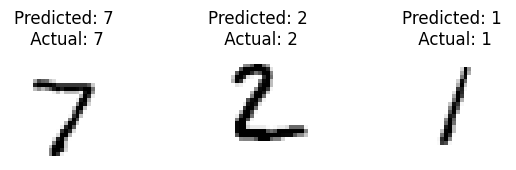

In [28]:
# Print model predictions along with ground-truth labels
for i, (prediction, gt_label) in enumerate(zip(predictions, y_test[:3])): 
    predicted_digit = prediction.argmax()
    print(f'Predicted: {predicted_digit}, Actual: {gt_label}')
    plt.subplot(1, 3, i+1)
    plt.imshow(x_new_data[i], cmap='binary')
    plt.title(f'Predicted: {predicted_digit}\n Actual: {gt_label}')
    plt.axis('off')
    plt.subplots_adjust(wspace=0.8)

In [ ]:
# Save the model in ./Saved_Models/FNN/ directory
model.save('./Saved_Models/FNN/mnist_fnn_model.h5')